#MundiHelper
###The motorbike price predictor.

In this notebook, you will se how we made the Mundimoto challenge. 
This parts only includes a bit of the solution that we propose. Here you can see how we created, trained and tested the linear regresion model.

First of all, we introduce all the imports that we need.

In [71]:
!pip install -q git+https://github.com/tensorflow/docs 

In [72]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

Here we can read the data provided from the dataset.

In [73]:
url = 'data_final.csv'
df = pd.read_csv(url,sep=";",low_memory=True)

We can look at the data right here.

In [74]:
df.head(10)

,id,brand,model,version,year,km,sell_price,purchase_price,cilindrada
0,24,YAMAHA,X-MAX,250,2018,40000,49900,250.0,21.0
1,27,HONDA,LEAD,110,2017,12000,20000,107.0,7.0
2,31,SUZUKI,GSX,1250 FA,2017,19100,75900,1250.0,98.0
3,37,YAMAHA,YZF,R1,2005,50000,46900,998.0,200.0
4,40,KAWASAKI,Z,900,2018,22800,65900,948.0,125.0
5,51,KAWASAKI,[*AJ*] NINJA,650,2018,10000,57900,649.0,68.0
6,59,KAWASAKI,VN,900 CLASSIC,2009,35000,49900,903.0,50.0
7,62,SUZUKI,[*AJ*] BURGMAN,125,2009,30000,18900,125.0,12.0
8,64,HONDA,CB,500 X ABS,2020,10000,54900,471.0,47.0
9,67,YAMAHA,XJ6,600 DIVERSION S ABS,2011,36000,41900,600.0,78.0


In this code part, we create the inputs and outputs for our model. The inputs are the X dataframe, and the outputs that the model should predict, are the Y dataframe.

We are also going to preprocess the data in the following cells.

In [75]:
Y = df['sell_price']
X = df.drop(columns=['sell_price', 'purchase_price', 'id'])
X.head()

,brand,model,version,year,km,cilindrada
0,YAMAHA,X-MAX,250,2018,40000,21.0
1,HONDA,LEAD,110,2017,12000,7.0
2,SUZUKI,GSX,1250 FA,2017,19100,98.0
3,YAMAHA,YZF,R1,2005,50000,200.0
4,KAWASAKI,Z,900,2018,22800,125.0


In our dataset, we have one categorical attribute, so we use a label encoder to make the inputs more easy to use for the model

In [77]:
le = LabelEncoder()
X['brand'] = le.fit_transform(X['brand'])
X['model'] = le.fit_transform(X['model'])
X['version'] = le.fit_transform(X['version'])


Once we have the inputs and outputs, we have to normalize the data, as the numbers differ too much.

In [79]:
scaler = MinMaxScaler()
df[["km", "purchase_price", " cilindrada"]] = scaler.fit_transform(df[["km", "purchase_price", " cilindrada"]])

Here we can see the correlation between the attributes.

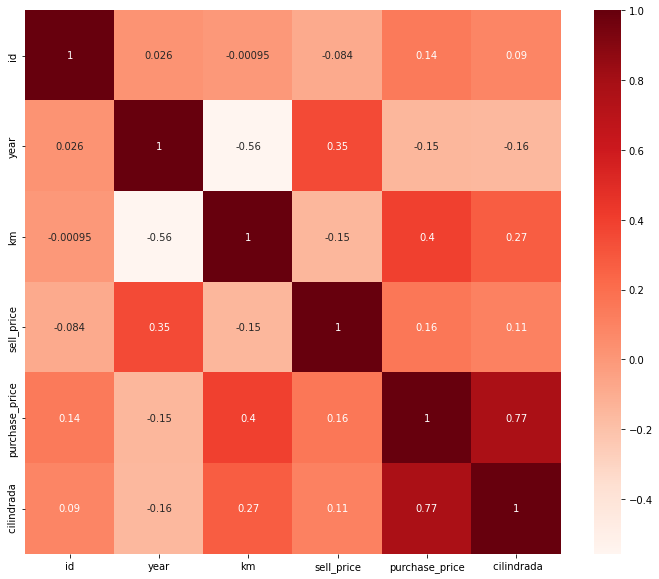

In [80]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

We create the train set and the test set.
The X ones are the inputs and the Y are the outputs that our models should have.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

We fill the NaN values from our sets as they can interfere with the model.

In [82]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)
y_train = y_train.fillna(0)

For our model, we will use a linear regression based on a Random Forest Regressor, as for price prediction is one of the bests.

In [83]:
clf = RandomForestRegressor(n_estimators=2000)

We train our model.

In [84]:
clf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=2000)

Now, with the model trained, we just have to test it with the test sets and evaluate the precision of our model.

In [86]:
clf.score(X_test,y_test)*100

72.6039330696254

As we can see here, we got a 72.6% precision, which we believe is more than enough given the data set.